# Twitter Challenge 1


## Recall that you were asked to retrieve ~ 10K tweets last week.

## Do the following:

1. Use any Python package(s) of your choice
2. Perform text pre-processing
3. Generate a word cloud
4. Post the word cloud (image) as a Tweet (using your own Twitter account).

### Briefly describe: what is the topic? what is the data period?
### Include #is434 #smu #scis hashtags in your tweet.

### 1) get tweet_text_list

In [1]:
import pandas as pd

In [2]:
# import csv files
df = pd.read_excel("tesla tweets.xlsx", header=None)
# get list of tweets

In [24]:
df_tweets = df.iloc[:,[1]]
df_tweets.squeeze()

0       RT @ElectrekCo: Tesla driver is charged vehicu...
1       RT @finto__: 「生きてるだけで偉い」という一見全肯定に思える念仏は、結局のところ...
2       @WatcherGuru #cheems 💥😍\n#pumps\n😋\n#BNB \n💥\n...
3       @GailAlfarATX @Tesla @elonmusk @teslacn Amazin...
4       RT @BrutalBearsNFT: 🚨Brutal Bears is giving aw...
                              ...                        
5981    @mikstro12 @McDonalds @Tesla search on dexscre...
5982                          @pulte Tesla Plaid maybe 🤔?
5983    RT @teslafsdbeta: When Tesla convertible? @elo...
5984    RT @Cointelegraph: McDonald’s has returned ser...
5985    @elonmusk @GailAlfarATX I'd love to be program...
Name: 1, Length: 5986, dtype: object

In [25]:
tweet_text_list = df_tweets.squeeze().tolist()

In [26]:
tweet_text_list

['RT @ElectrekCo: Tesla driver is charged vehicular manslaughter after running a red light on Autopilot https://t.co/JuARXslqFF by @fredericlambert',
 'RT @finto__: 「生きてるだけで偉い」という一見全肯定に思える念仏は、結局のところ「偉い－偉くない」という価値観の再生産に与することに他ならないのだから、本来は「偉くなくてもいい」と言ってやるべきだみたいなことをnoteに書いたら、「みんな偉いんですよ！」と怒られてしまった。おれの方が優しいのに……',
 '@WatcherGuru #cheems 💥😍\n#pumps\n😋\n#BNB \n💥\n#cinu\n💣\n#memecoin\n😱\n#BSC\n💯\n#CheemsInu \n🥸\n#NFT \n😎\n#CHEEMSARMY \n🚀\n#CoinMarketCap \n👍\n#CheemsIsTheNewShib \n🐶\n#pumped \n⚡\n#Binance \n🧨\n#metavers \n🧿\n#CheemsTotheMoon \n🎯\n#Metamask \n👑\n#Tesla \n🔊\n#Coinbase \n📈\n#Elonmusk \n💰💵💰💴💰 https://t.co/6SJ011PhZg',
 '@GailAlfarATX @Tesla @elonmusk @teslacn Amazing!!! Wow',
 'RT @BrutalBearsNFT: 🚨Brutal Bears is giving away 1 #PS5 a week for 4 weeks. 1st #Giveaway ends 1/25 🎮\n\nHuge roadmap, w/ #Tesla Model 3 Giveaway!\n💰 #NFT w/ #P2E Game Utility\n\nTo Enter ⬇️\n➡️ Follow @brutalbearsnft\n➡️ Like &amp; RT original post\n➡️ Tag 3 Friends \n➡️ Join #Discord https://t.co/iVNduHu49n

In [27]:
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [28]:
my_results = [clean_tweet(tw) for tw in tweet_text_list]
results = my_results

C:\Users\Cheong Kenn Ee\AppData\Local\Temp\ipykernel_14892\1075154670.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


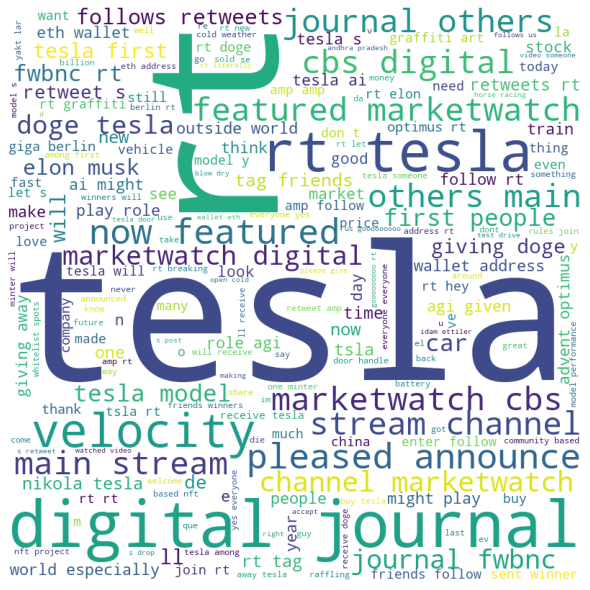

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()